In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.ticker as mticker
import seaborn as sns 



In [ ]:
#of course the path to the file is the one on my computer since it was not on the repo
df = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/ADM HW-2/steam_reviews.csv', usecols = ['app_name','review','review_id','recommended', 'steam_purchase', 'received_for_free' ])

# RQ2
---

## Cleaning the data

We firstly need to check for any missing entries in the data.

In [6]:
df.isna().sum()

app_name                 0
review_id                0
review               33748
recommended              0
steam_purchase           0
received_for_free        0
dtype: int64

There are as we can see 33748 reviews "missing", or more preciselly reviews with no text inside. These can still be considered in the review count for each application because the users still gave a positive or negative recommendation.

In [7]:
df[['review', 'review_id', 'recommended']].loc[(df['review'].isna()) & (df['recommended'] == True) ]

review  review_id  recommended
32          NaN   85176661         True
116         NaN   85157446         True
234         NaN   85137051         True
653         NaN   85054410         True
700         NaN   85046235         True
...         ...        ...          ...
21742475    NaN   65683010         True
21743370    NaN   65674271         True
21744390    NaN   65665688         True
21745382    NaN   65659679         True
21746746    NaN   65651280         True

[32813 rows x 3 columns]

Since there are no value missing we can count the number of occurencies for each app_name value to get the list of the top and lowest five apps for number of reviews received.

---
## 2.1 Identify which applications have the highest and lowest number of reviews.

In [8]:
df['app_name'].value_counts()

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS      1644255
Grand Theft Auto V                 1019116
Tom Clancy's Rainbow Six Siege      841918
Terraria                            672815
Garry's Mod                         655524
                                    ...   
Don't Escape: 4 Days to Survive       1013
Out of the Park Baseball 19            700
Shadow Complex Remastered              700
DRAGON QUEST HEROES™ II                600
Neon Hardcorps                         200
Name: count, Length: 315, dtype: int64

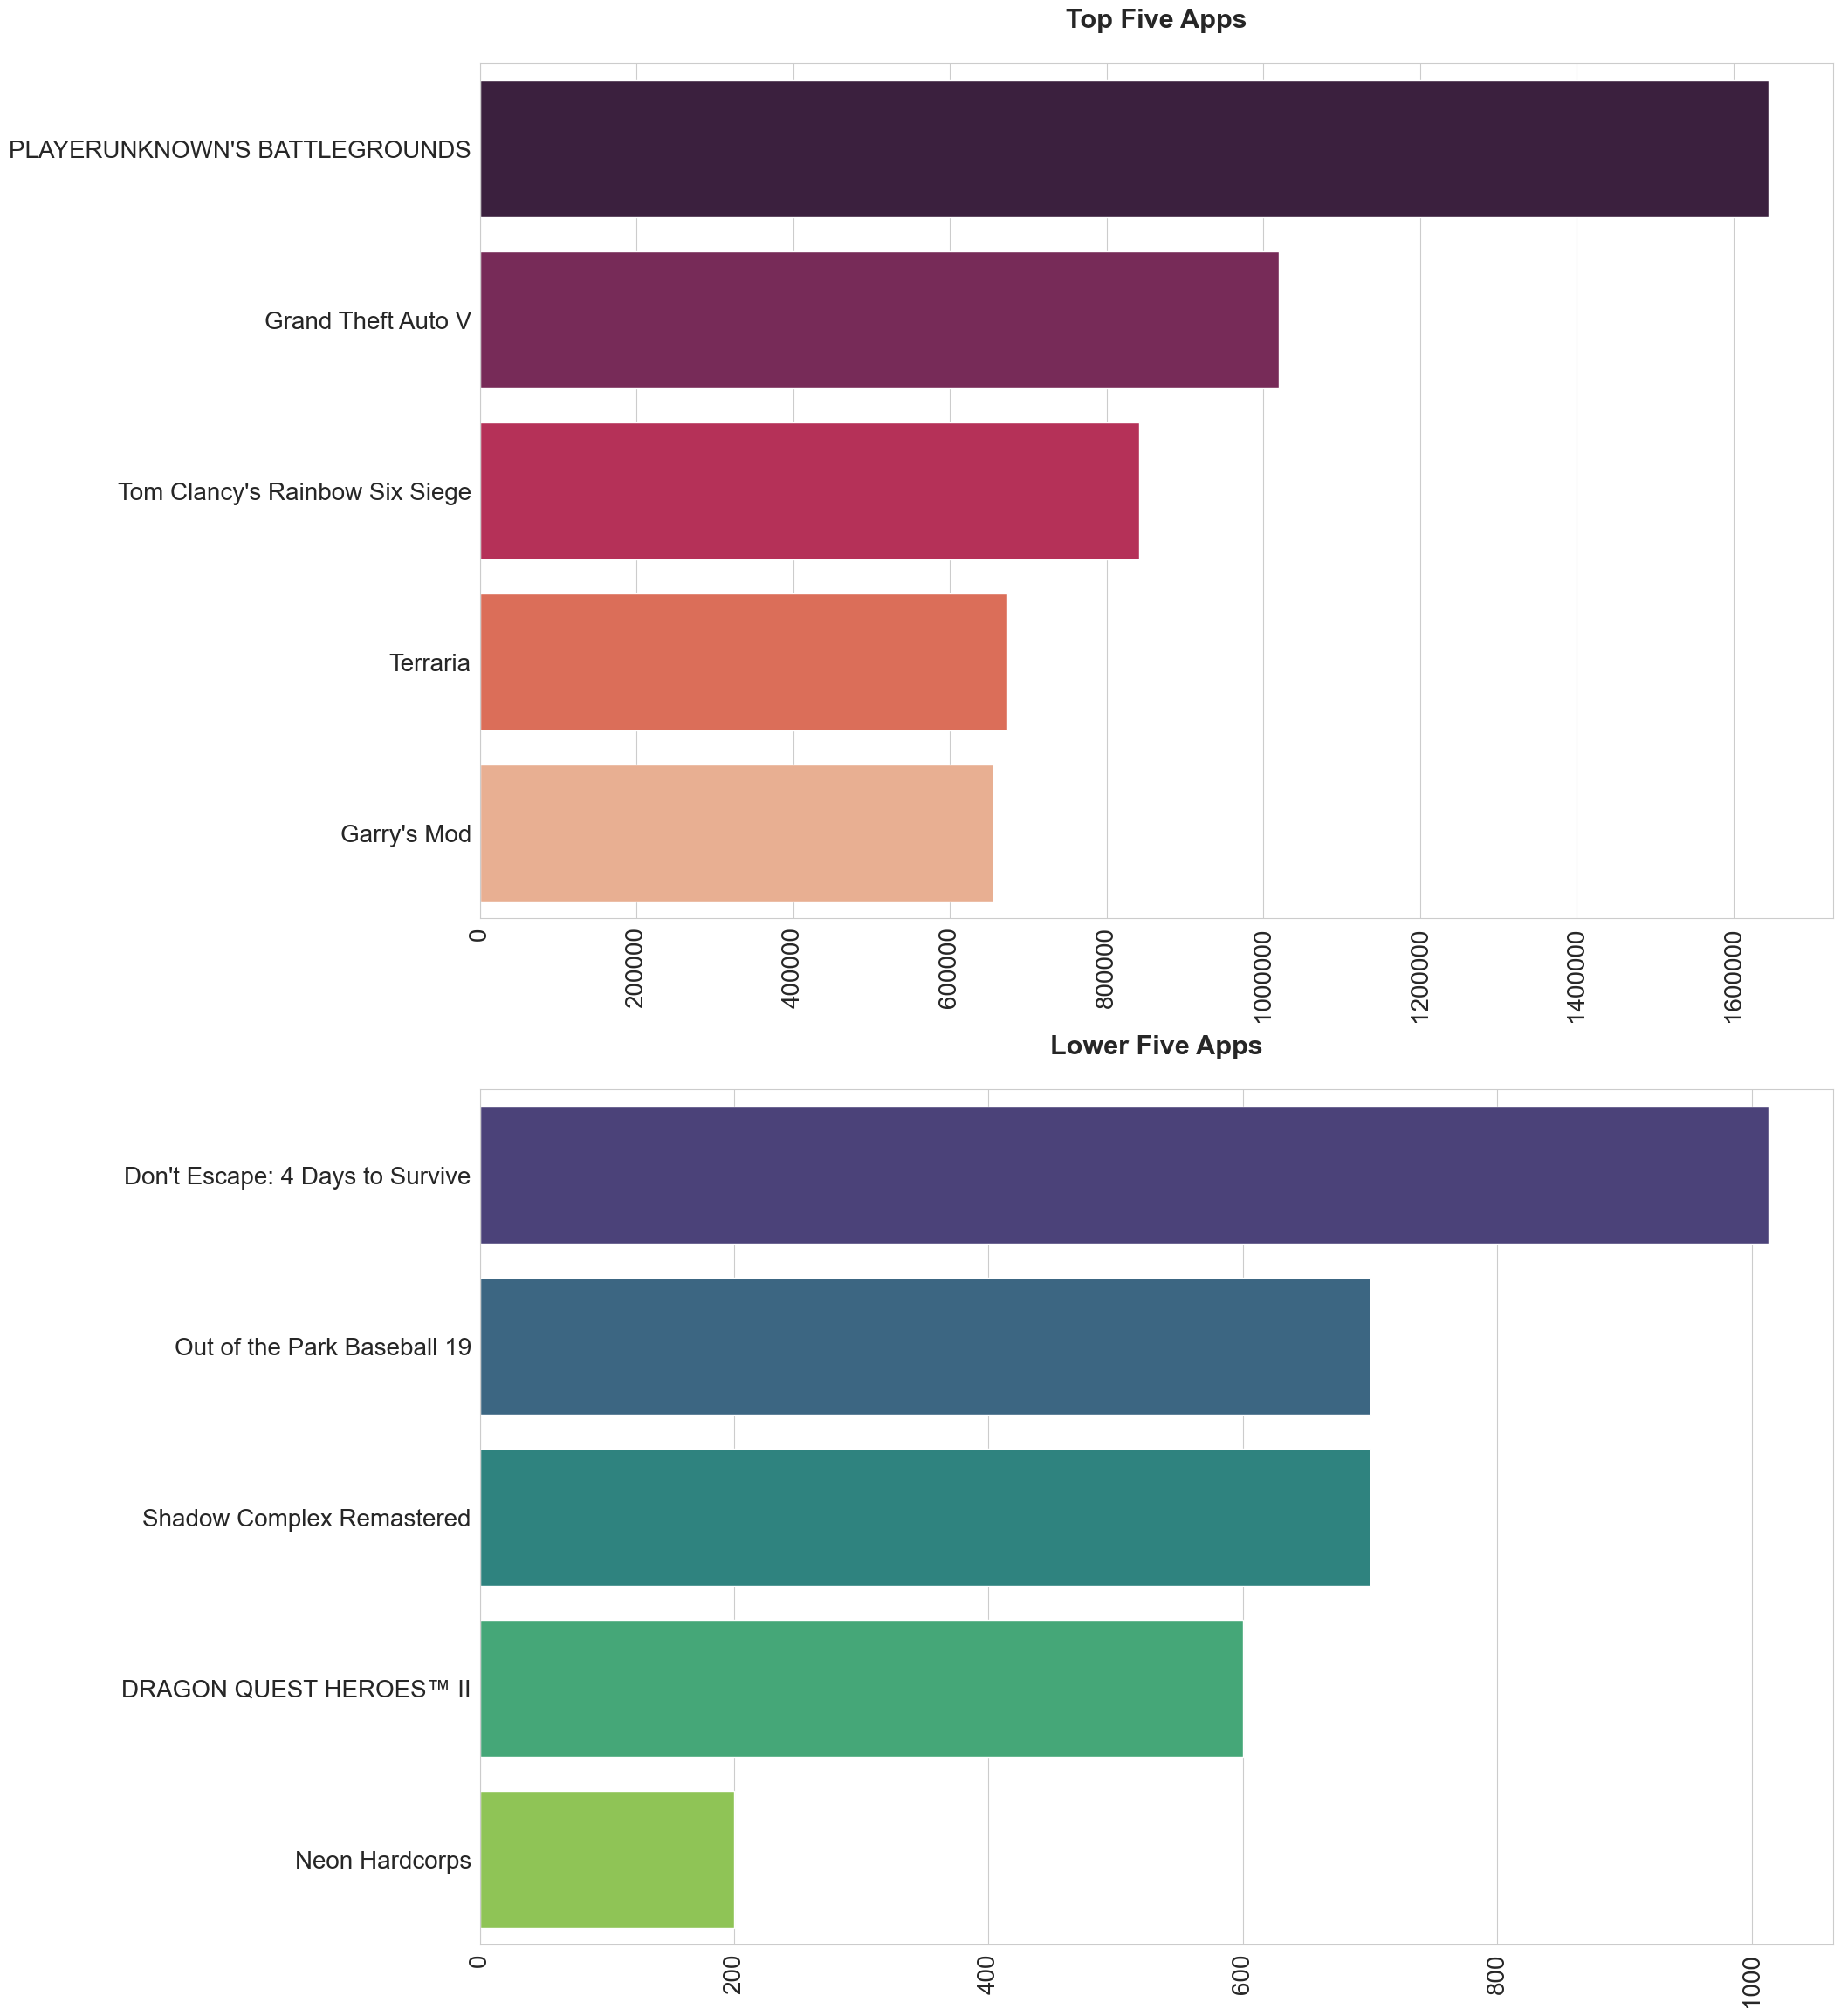

In [9]:
top_5 = df['app_name'].value_counts()[:5]
lower_5 = df['app_name'].value_counts()[-5:]

sns.set_style("whitegrid") 

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 28))


sns.barplot(x = top_5.values, y = top_5.index, ax=  ax[0], hue= top_5.index, palette = 'rocket', orient='h')
ax[0].set_title('Top Five Apps\n', fontsize = 22, fontweight='bold')
ax[0].tick_params(axis='x', rotation =90, labelsize = 20)
ax[0].tick_params(axis='y',  labelsize = 20)
ax[0].set_ylabel(None)
ax[0].get_xaxis().get_major_formatter().set_scientific(False)


sns.barplot(x = lower_5.values, y = lower_5.index, hue= lower_5.index,ax = ax[1], palette = 'viridis', orient='h')
ax[1].set_title('Lower Five Apps\n', fontsize = 22,fontweight='bold')
ax[1].tick_params(axis= 'x', rotation= 90, labelsize = 20)
ax[1].tick_params(axis='y',  labelsize = 20)
ax[1].set_ylabel(None)

plt.show()


---
## 2.2 Plot the number of reviews for each application in descending order. What insights can you draw from the plot?

In [10]:
df['app_name'].describe()

count                          21747371
unique                              315
top       PLAYERUNKNOWN'S BATTLEGROUNDS
freq                            1644255
Name: app_name, dtype: object

As we can see there are more than 300 applications in this dataset, so the plot will be very difficult to read, but it may still give us some visual clues.

/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missi

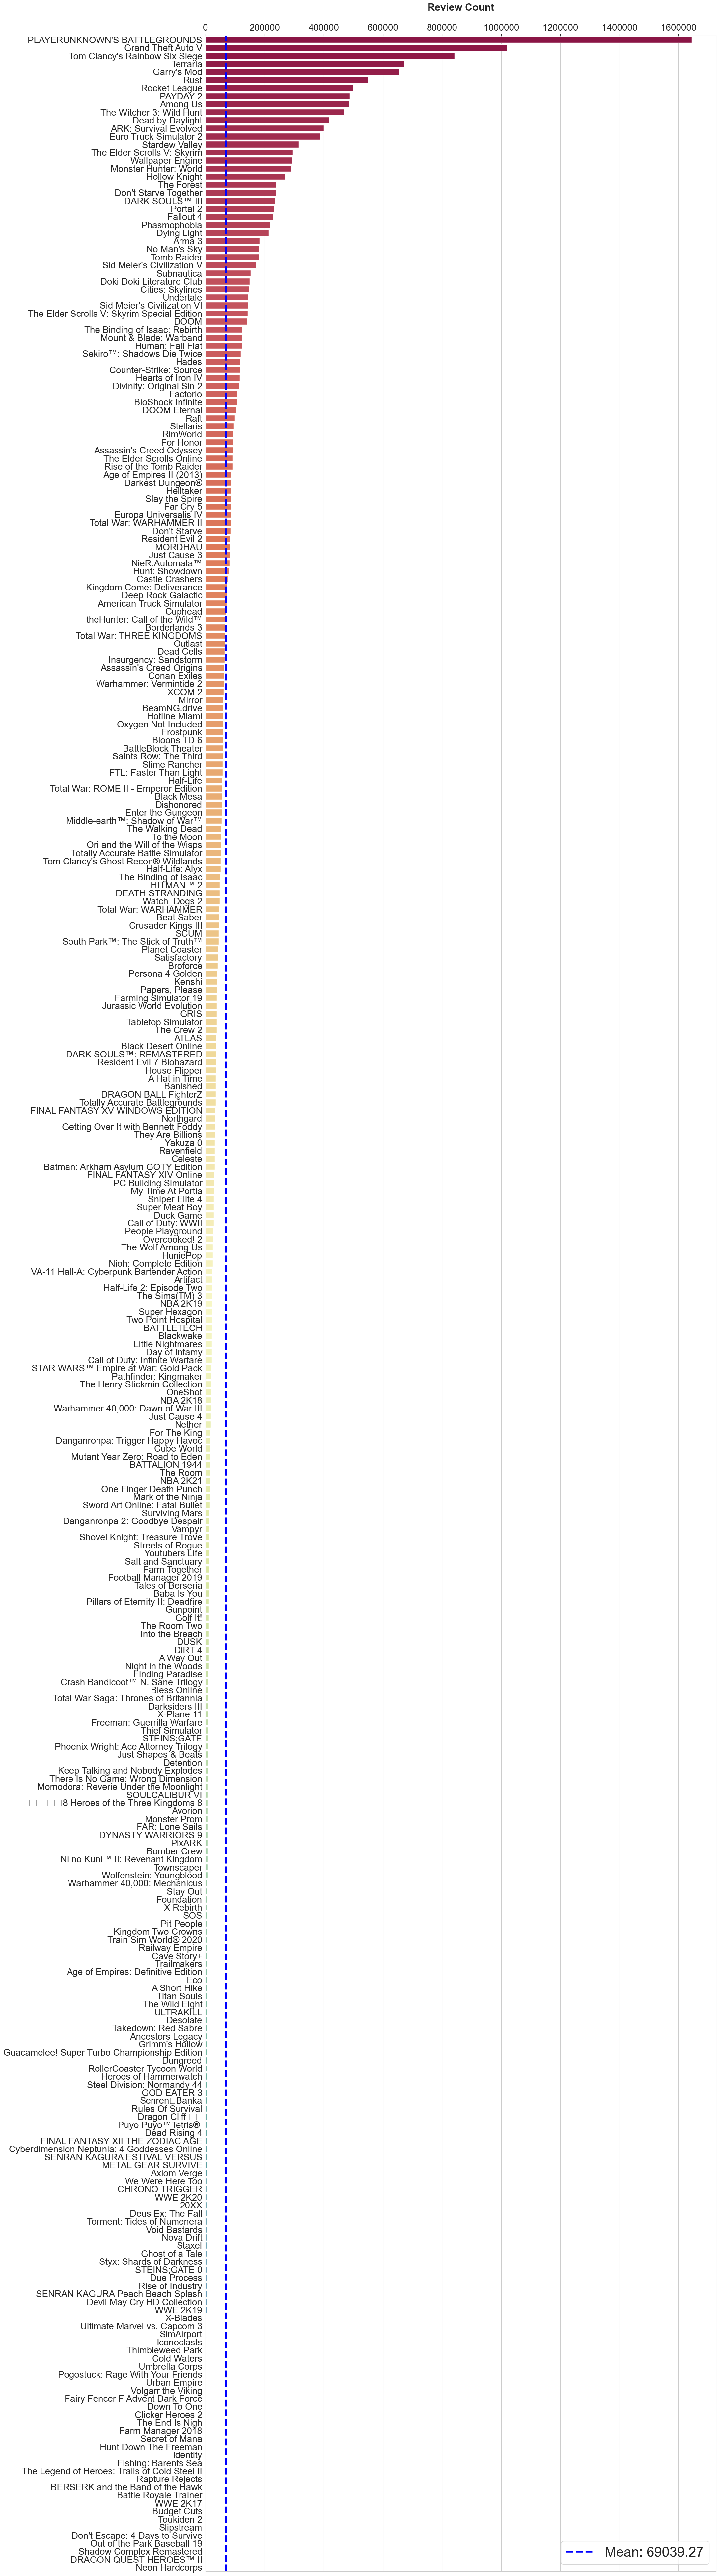

In [11]:
review_count = df['app_name'].value_counts()

plt.figure(figsize=(20, 100))
sns.set_style("whitegrid")
ax = sns.barplot(
    x=review_count.values, 
    y=review_count.index, 
    hue=review_count.index, 
    palette='Spectral',
    orient='h'
)

mean_value = np.mean(review_count.values)
plt.axvline(x=mean_value, color='b', lw=4, label=f'Mean: {mean_value:.2f}', linestyle = '--')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both',  labelsize = 20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.set_title('Review Count\n', fontsize = 22, fontweight='bold')
ax.set_ylabel(None)
plt.legend(fontsize=30, loc = 'lower right' )

plt.show()




This is not very readable, so here is another plot that just shows the curve: 

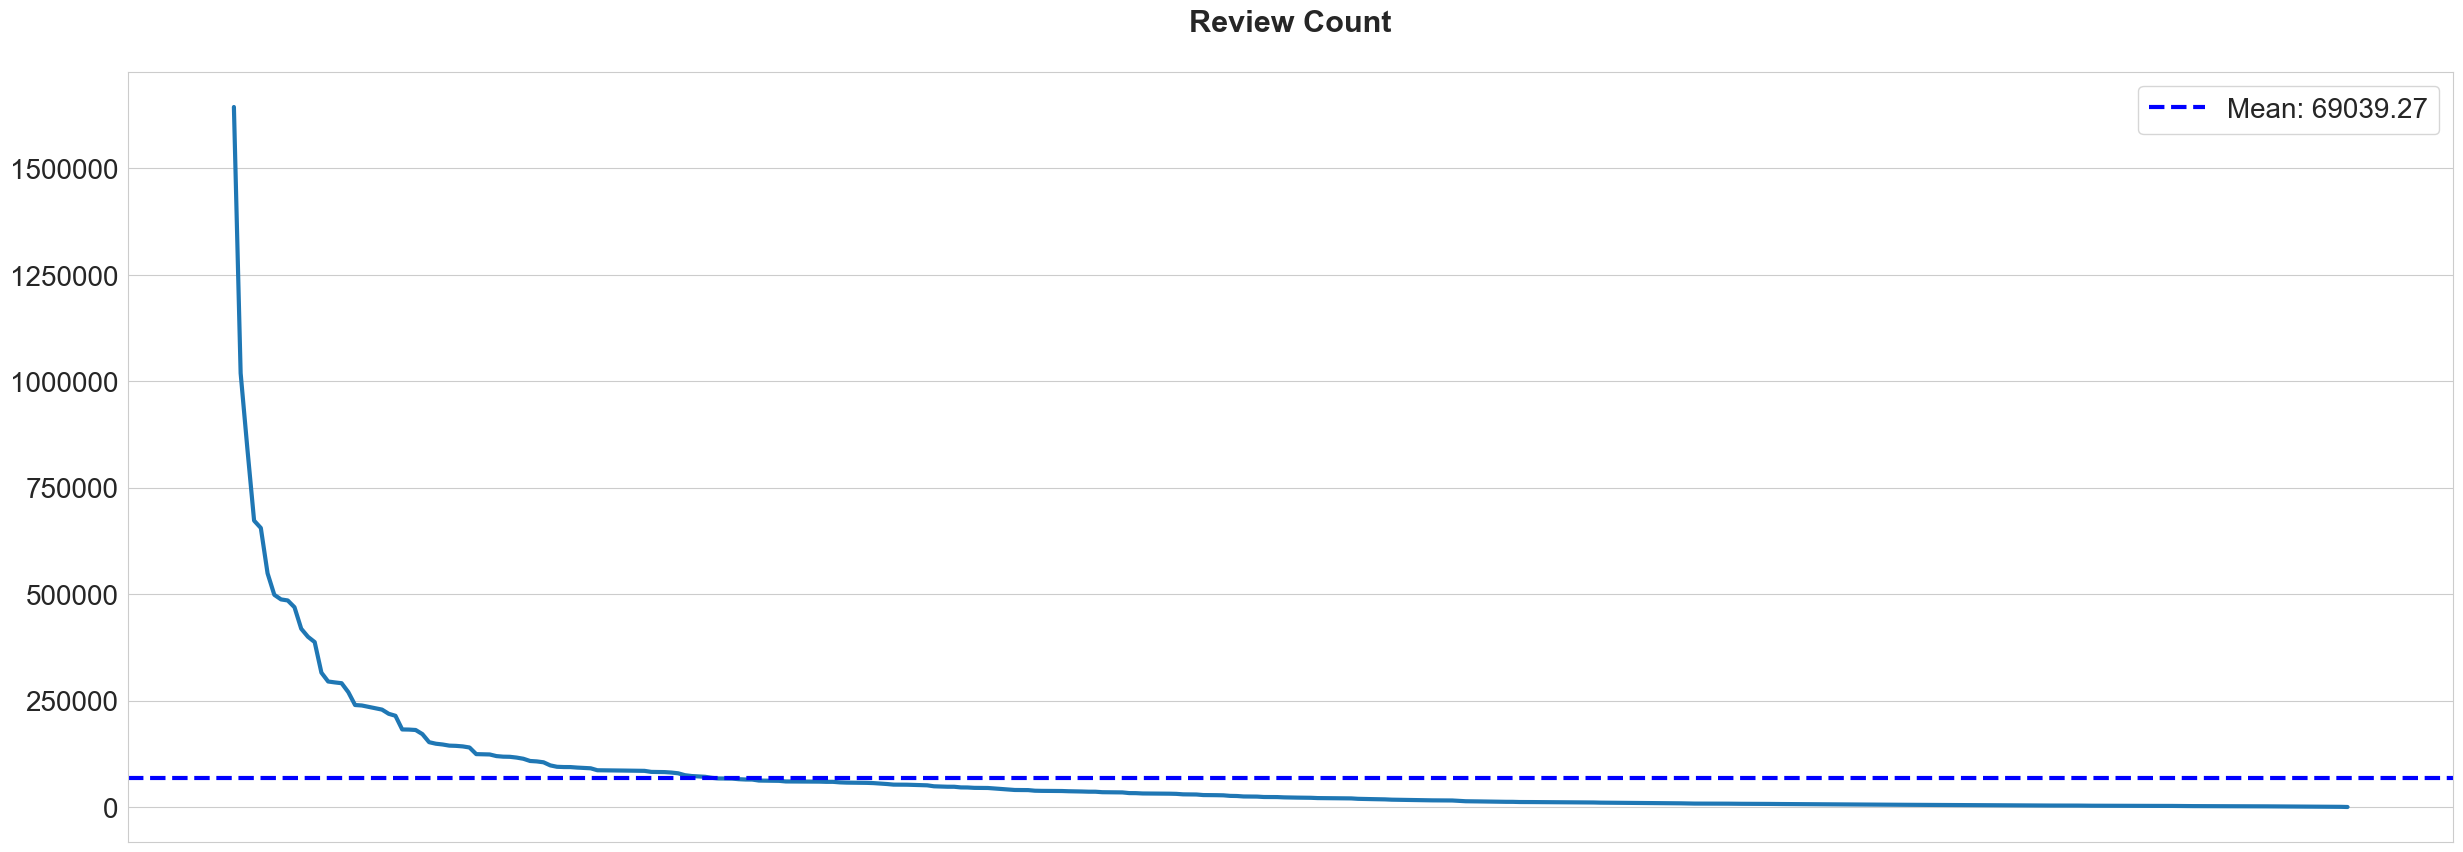

In [28]:
review_count = df['app_name'].value_counts()

plt.figure(figsize=(30, 10))
sns.set_style("whitegrid")
ax = sns.lineplot(
    x=review_count.index, 
    y=review_count.values,
    linewidth = 3
)

mean_value = np.mean(review_count.values)
plt.axhline(y=mean_value, color='b', lw=3, label=f'Mean: {mean_value:.2f}', linestyle = '--')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both',  labelsize = 20)

#this changes the notation for the numbers on the y axis 
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

plt.xticks([])
ax.set_title('Review Count\n', fontsize = 22, fontweight='bold')
ax.set_xlabel(None)
plt.legend(fontsize=20, loc = 'upper right' )

plt.show()

In [12]:
x = review_count[review_count.values >= 400000]
percent_top_10 = f"{sum(x.values)/sum(review_count.values):.2%}"
percent_top_10

'37.44%'

As we can see from this plot most of the apps have a value count lower than the average, there are infact only 71 of 315 total apps above this threashold. The graph is clearly right skewed and shows that the first 5 to 10 apps have significally bigger reviews' counts than the rest, with also bigger jumps between them. The top 10 apps for number of reviews alone make up almost 40% of the total reviews as clearly showed by the sharp decrease in review count at the left of the graph.

---
## 2.3 For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.

We will take a look now at how many of this reviews came from users who had actually bought the game or instead received it for free.

In [19]:
top_apps = review_count.index[:5]
top_apps_df = df.query('app_name in @top_apps')
top_apps_df.groupby('app_name')[['steam_purchase','received_for_free']].value_counts()

app_name                        steam_purchase  received_for_free
Garry's Mod                     True            False                 533729
                                False           False                  97030
                                True            True                   17521
                                False           True                    7244
Grand Theft Auto V              True            False                 873339
                                False           False                 107153
                                True            True                   31949
                                False           True                    6675
PLAYERUNKNOWN'S BATTLEGROUNDS   True            False                1329132
                                False           False                 253680
                                True            True                   43589
                                False           True                   17854
Terraria  


 > Now immediately we can notice something unexpected, the variables **steam_purchase** and **received_for_free** are __not mutually exclusive__, also there are many revies left by users who had neather bought the game on the steam store nor received it for free. 
 >Firstly we could theorize that steam registers a user (in this dataset) as having bought the game even if he/she received it for free and then bought an expantion or a DLC. Secondly, it is possible that many reviewers left a recomendation without owning the game or having bought it from another platform.

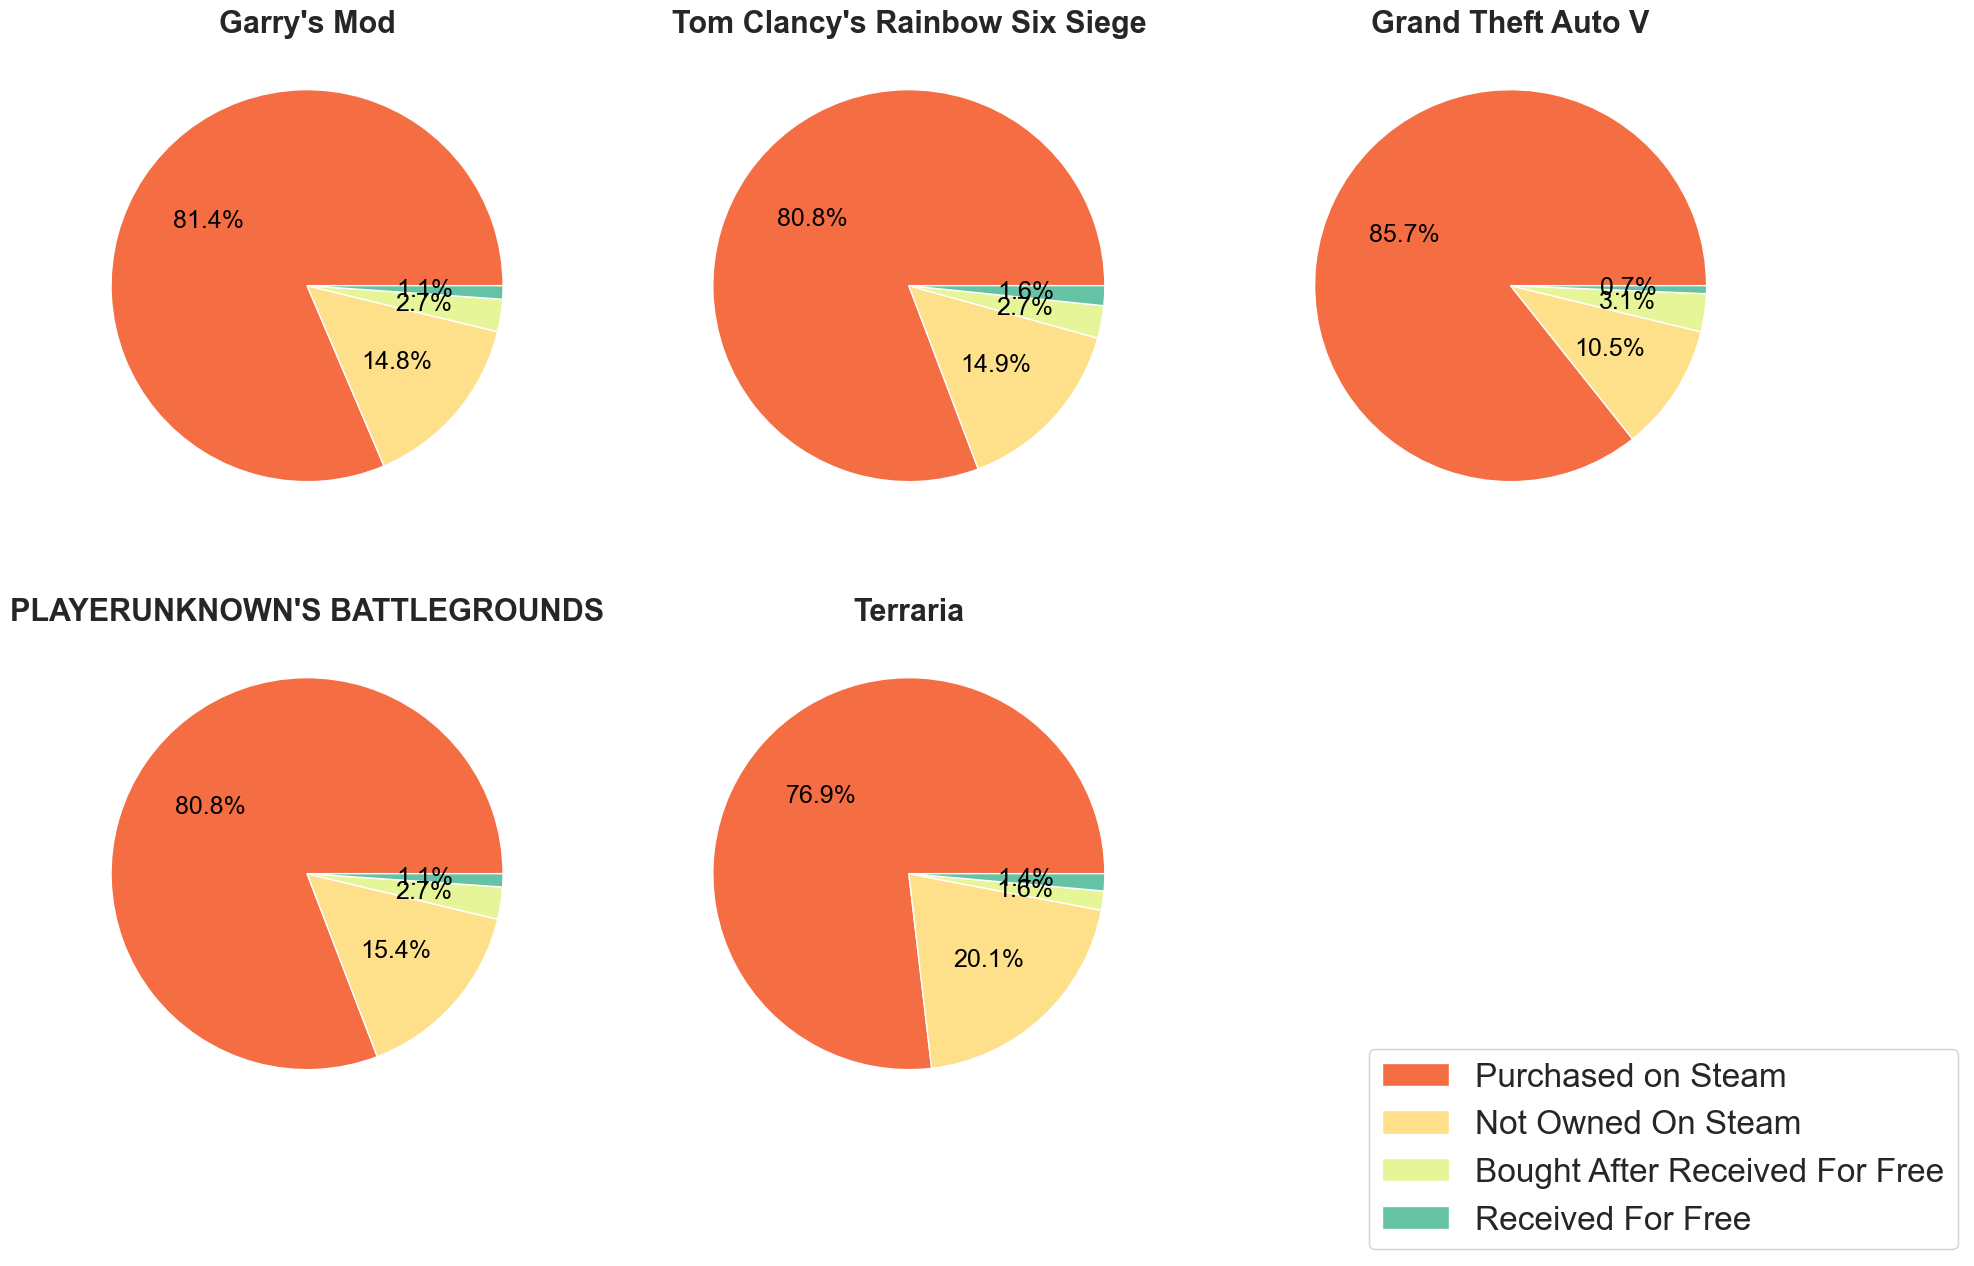

In [59]:
sns.set_style("whitegrid") 

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(22, 14))
ax = ax.flatten()

purchase_df = top_apps_df.groupby('app_name')[['steam_purchase','received_for_free']].value_counts()
lab = ['Purchased on Steam', 'Not Owned On Steam', 'Bought After Received For Free', 'Received For Free']

palette = sns.color_palette("Spectral", 4)

for index, game in enumerate(top_apps_df['app_name'].unique()):
    
    game_data = purchase_df.loc[game]
    count = [i for i in game_data.values]

    ax[index].pie(count, colors = palette, autopct='%.1f%%', textprops={'fontsize': 18, 'color': 'black'})
    ax[index].set_title(f"{game}",  fontsize=22, fontweight='bold')

fig.delaxes(ax[5])

fig.legend(labels = lab, loc='lower right', fontsize = 24, title_fontsize= 16, framealpha = 0.9)

plt.show()



> All the top 5 applications seems to have more or less the same distribution between the 4 categories highlated. As we can see the vast majority of reviews come from users that have bought the application on steam, the second largest group of reviews then come from users who don't own the game on Steam.

---
## 2.4 Which applications have the most and the least user recommendations? Summarize your findings.
lets take a look at the top and lower five applications for number of **positive** recommendations.

In [74]:
# subsetting to only rows with variable "recommended" equals true
rec_df = df.loc[df['recommended'] == True]

rec_df['app_name'].value_counts()

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
                                   ...  
Out of the Park Baseball 19          594
Shadow Complex Remastered            587
Identity                             439
DRAGON QUEST HEROES™ II              423
Neon Hardcorps                        89
Name: count, Length: 315, dtype: int64

As we could have expected the top five games for number of positive recommendetions are the same as the top five for number of reviews. Indicating that the most popular games are also the most often reviewd. The same is true for the lowest five applications, which have also remained the same. This could indicate a direct relation between the number of review and the total number of positive reccomendetions. 

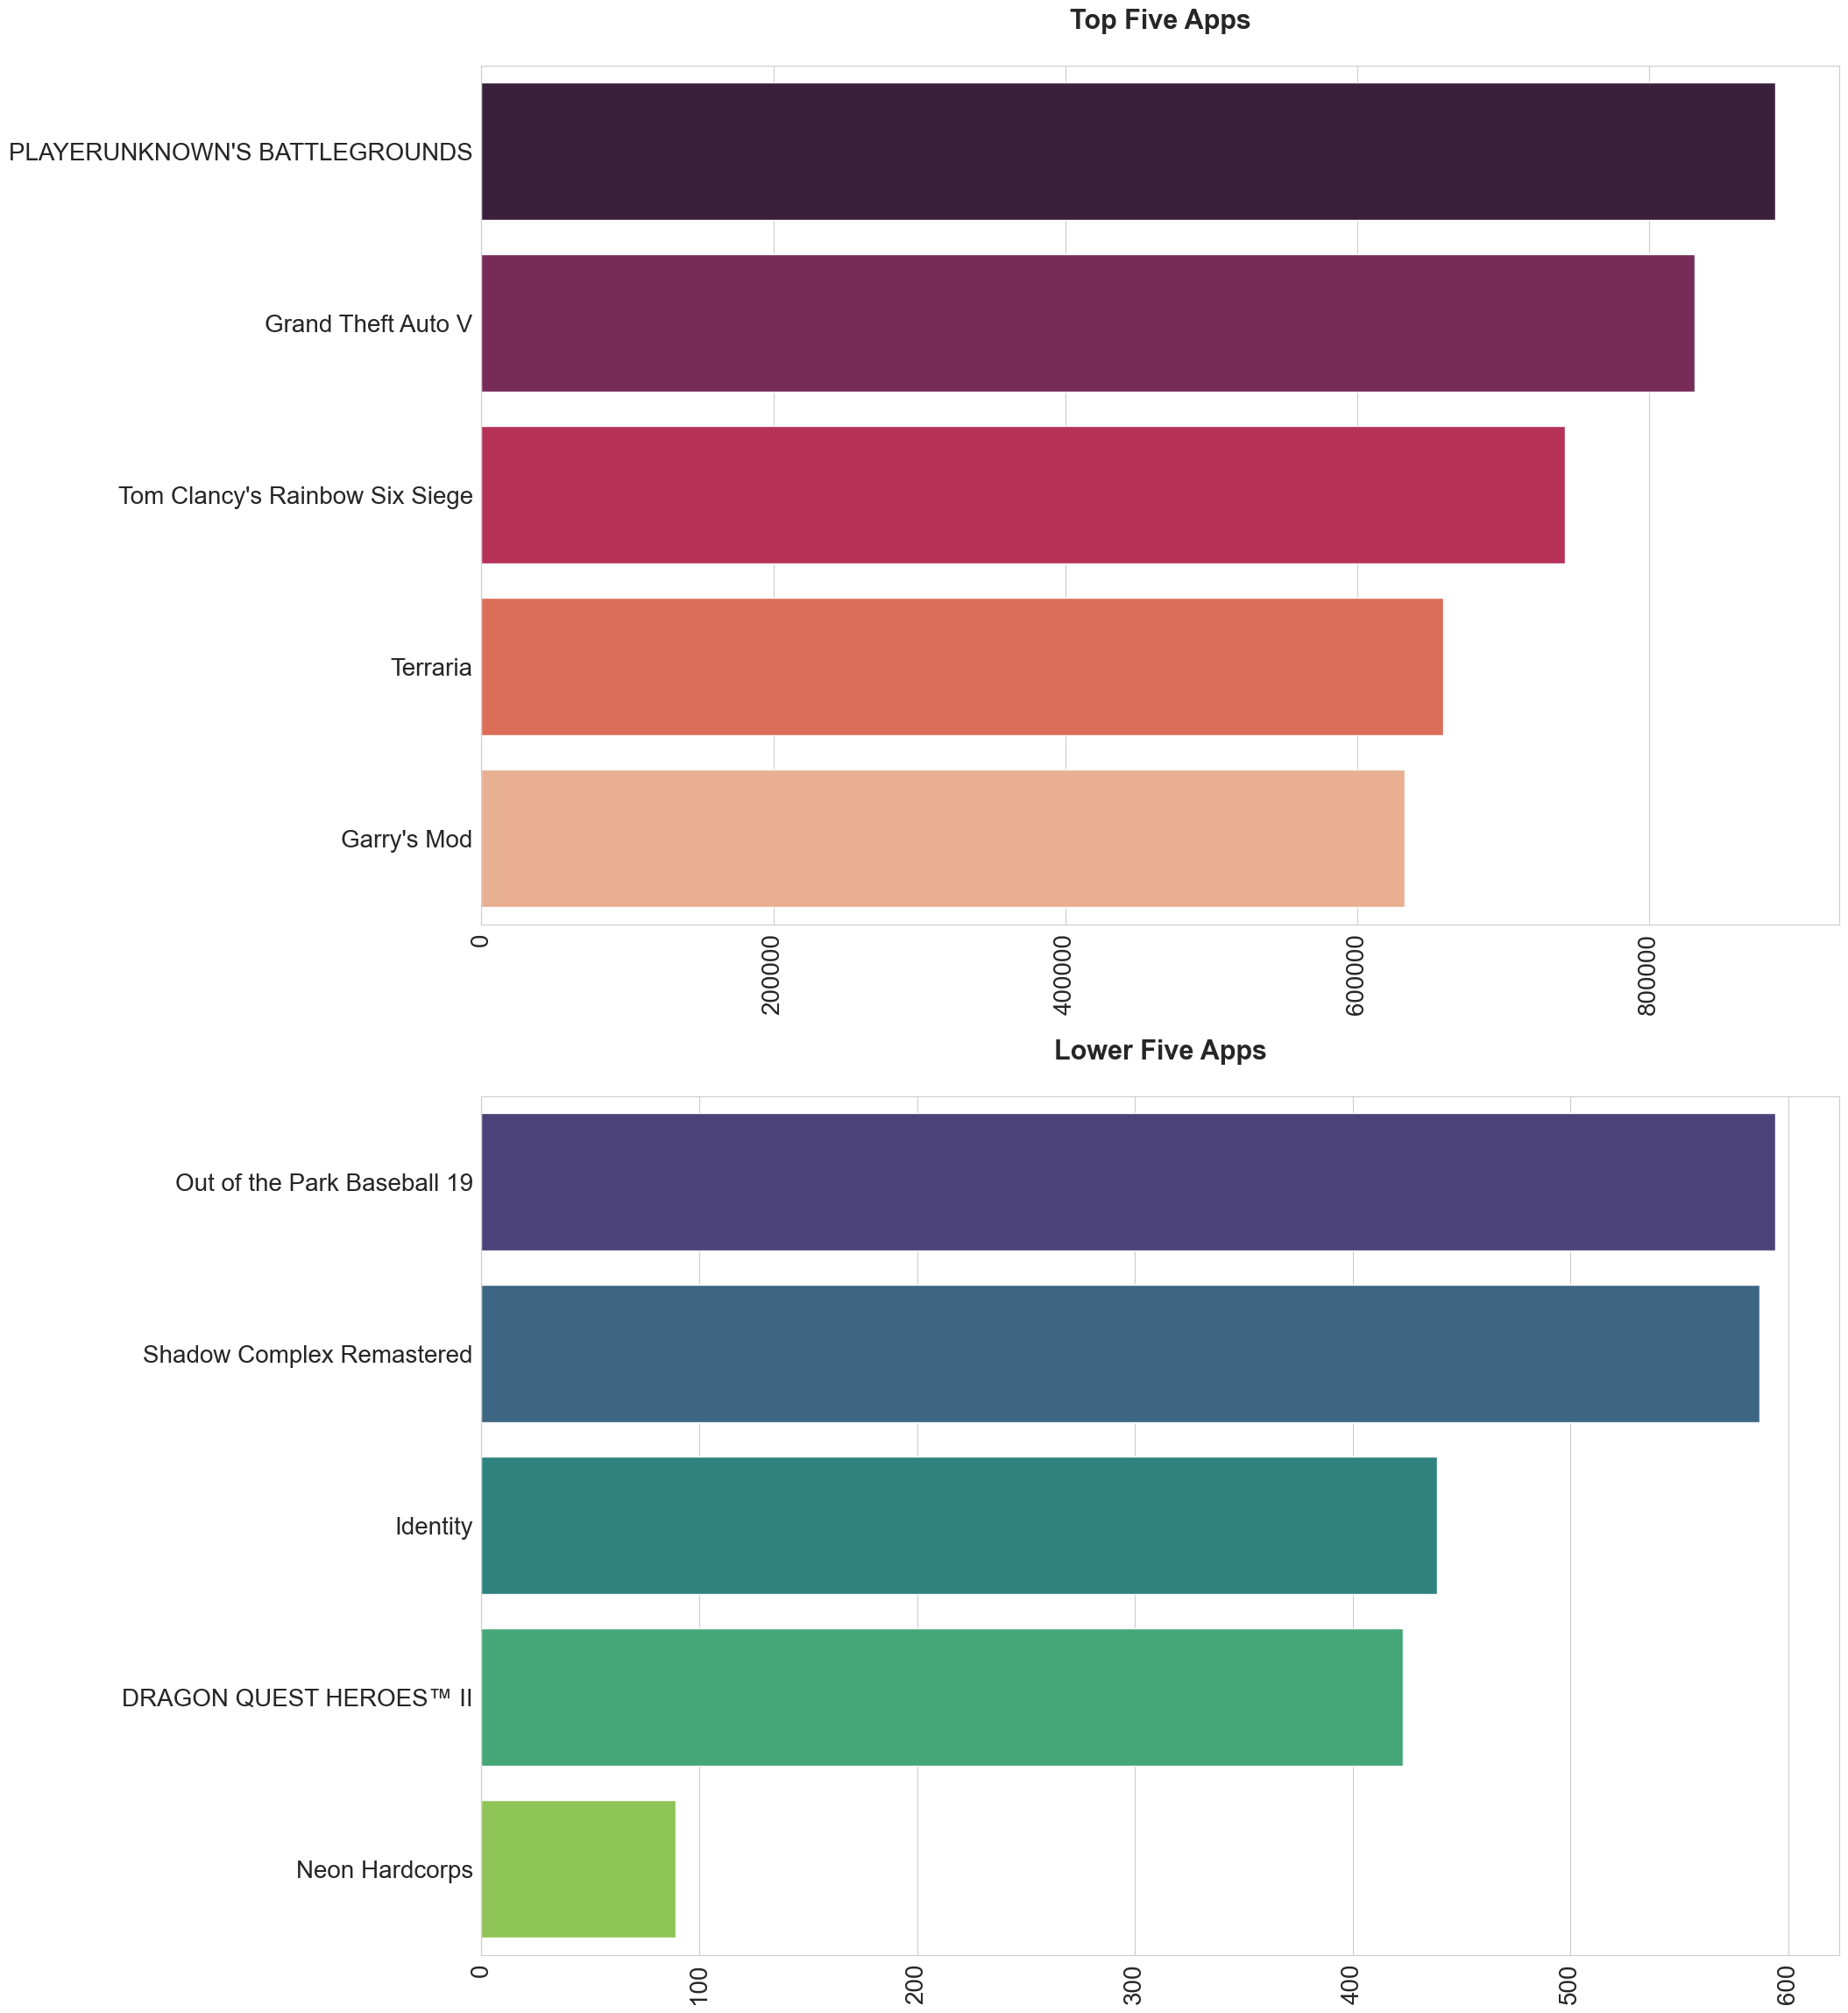

In [166]:
top_5 = rec_df['app_name'].value_counts()[:5]
lower_5 = rec_df['app_name'].value_counts()[-5:]

sns.set_style("whitegrid") 

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 28))


sns.barplot(x = top_5.values, y = top_5.index, ax=  ax[0], hue= top_5.index, palette = 'rocket', orient='h')
ax[0].set_title('Top Five Apps\n', fontsize = 22, fontweight='bold')
ax[0].tick_params(axis='x', rotation =90, labelsize = 20)
ax[0].tick_params(axis='y',  labelsize = 20)
ax[0].set_ylabel(None)


sns.barplot(x = lower_5.values, y = lower_5.index, hue= lower_5.index,ax = ax[1], palette = 'viridis', orient='h')
ax[1].set_title('Lower Five Apps\n', fontsize = 22,fontweight='bold')
ax[1].tick_params(axis= 'x', rotation= 90, labelsize = 20)
ax[1].tick_params(axis='y',  labelsize = 20)
ax[1].set_ylabel(None)

plt.show()


---
## 2. 5 Crazy nonses question



---









# RQ7
---
## 7.1 & 7.2

### P1 = "probability of submitting a review and receiving at least one helpful vote"
### P2 = "probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app"
---


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns 
from scipy.stats import shapiro

df = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/ADM HW-2/steam_reviews.csv', usecols = ['app_name',
                                                 'recommended',
                                                 'review',
                                                 'votes_helpful',
                                                 'author.steamid',
                                                 'author.num_games_owned',
                                                 'author.num_reviews'])


In [32]:
df['votes_helpful'].describe()

count    2.174737e+07
mean     4.044689e+05
std      1.333741e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.398047e+12
Name: votes_helpful, dtype: float64

We can see from this short description of the variable **votes_helpful** that there are some impossibly high instances, as indicated by the maximum. Let's look for this numbers!

In [33]:
q = df['votes_helpful'].quantile(0.99)

count_q = df['votes_helpful'].loc[df['votes_helpful'] > df['votes_helpful'].quantile(0.99)].count()
totcount = df['votes_helpful'].count()

print(f"the 0.99 quantile: {q} \nthe total count of values in votes_helpful: {totcount} \nthe count of values above 0.99 quantile: {count_q} ")

the 0.99 quantile: 22.0 
the total count of values in votes_helpful: 21747371 
the count of values above 0.99 quantile: 211840 


As we can see there are many outliers in this dataset, many of this values could be possible but taking a look at the maximum value of 4,398,047,000,000 there is no mistake that this is an error.

let's take a look at the row with this large values

In [34]:
df.loc[df['votes_helpful'] > 1000000]

app_name                                             review  \
10449392     Broforce  Jogo muito bom. Recomendo ele, vale cada centa...   
10751984  Bloons TD 6  I don't know what to say, but just to go pop s...   

          recommended  votes_helpful     author.steamid  \
10449392         True  4398046511104  76561198315745673   
10751984         True  4398046511106  76561198049020554   

          author.num_games_owned  author.num_reviews  
10449392                     100                   2  
10751984                    3524                 322

Using their SteamId values it is actually possible to find online the users and their reviews and we could of course correct the dataset:

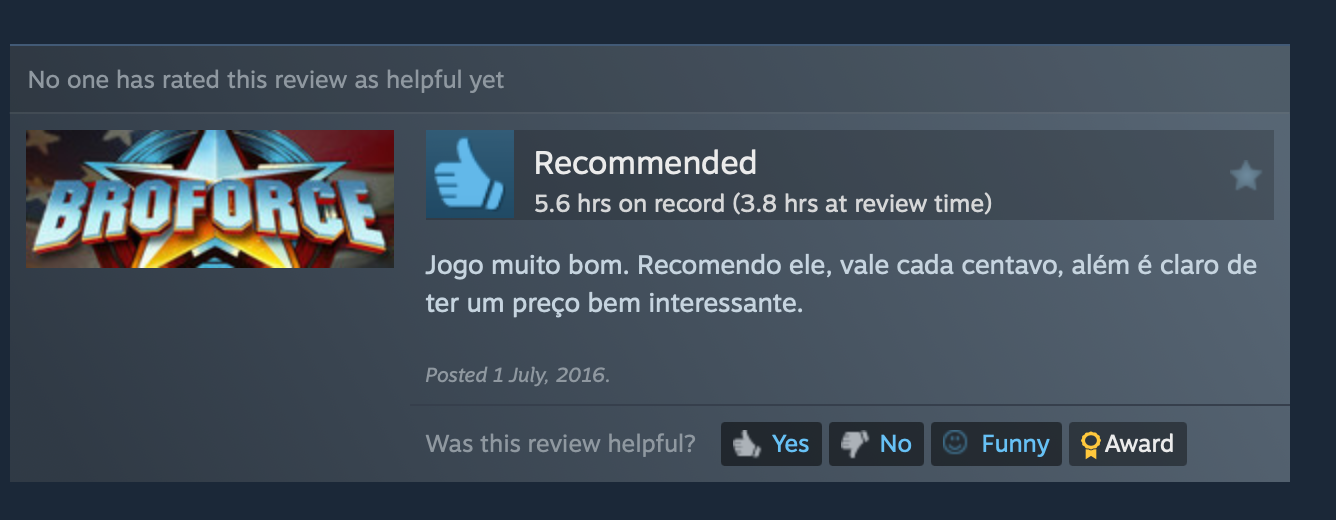

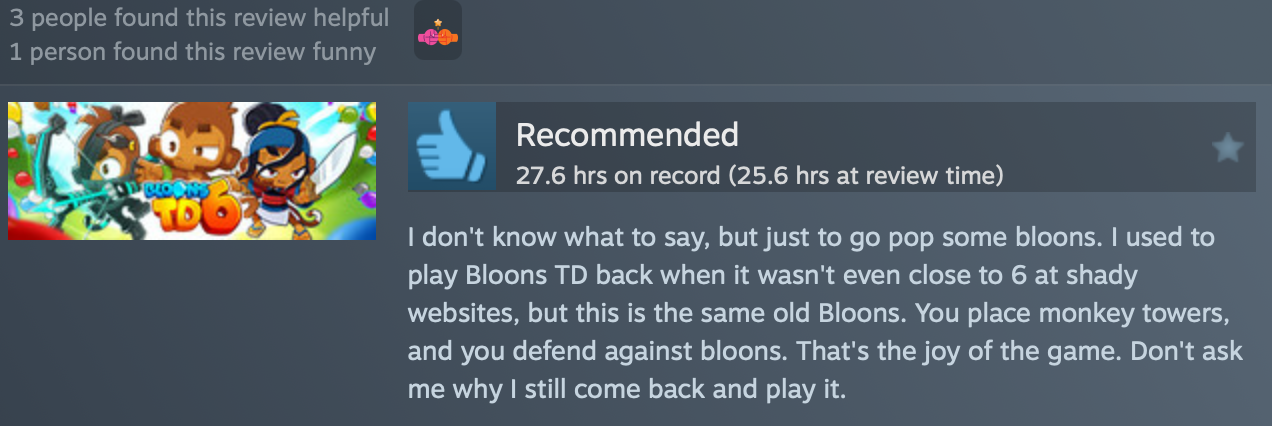

In [35]:
# modify the original df
df.loc[df['votes_helpful'] > 1000000, 'votes_helpful'] = [0, 3]

#check 

df.loc[(df['app_name'] == 'Bloons TD 6') & (df['author.steamid'] == 76561198315745673) ]
df.loc[(df['app_name'] == 'Bloons TD 6') & (df['author.steamid'] == 76561198049020554) ]

app_name                                             review  \
10751984  Bloons TD 6  I don't know what to say, but just to go pop s...   

          recommended  votes_helpful     author.steamid  \
10751984         True              3  76561198049020554   

          author.num_games_owned  author.num_reviews  
10751984                    3524                 322

Doing this for all values above the 0.99 quantile would be of course impracticle. Therefore to be more conservative we chose to get rid of all values above the 0.999 quantile.

In [36]:
new_df_filtered = df.loc[df['votes_helpful'] <= q]
new_df_filtered['votes_helpful'].describe()

count    2.153553e+07
mean     6.437542e-01
std      1.851247e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.200000e+01
Name: votes_helpful, dtype: float64

## P1:

In [37]:
tot = len(new_df_filtered['votes_helpful'])
helpful_df = new_df_filtered.loc[new_df_filtered['votes_helpful'] >= 1, 'votes_helpful']
E = len(helpful_df)
prob = f"{E/tot:.1%}"
print(prob)

27.4%


## P2:

In [38]:
tot = len(new_df_filtered.loc[df['recommended']== False])
helpful_F_df = new_df_filtered.loc[(new_df_filtered['votes_helpful'] >= 1) & (new_df_filtered['recommended'] == False), 'votes_helpful']
E = len(helpful_F_df)
prob = f"{E/tot:.1%}"
print(prob)


47.3%


---
## 7.3

### Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? 
---

In [39]:
import pandas as pd
import scipy.stats as stats

# Assuming 'votes_helpful' and 'author_num_reviews' exist in your DataFrame
new_df_filtered['helpful_vote'] = (new_df_filtered['votes_helpful'] >= 1)
new_df_filtered['has_submitted_five_reviews'] = (df['author.num_reviews'] >= 5)
print(new_df_filtered[['helpful_vote','votes_helpful']].loc[new_df_filtered['helpful_vote']== True])
# Create a contingency table
contingency_table = pd.crosstab(new_df_filtered['helpful_vote'], new_df_filtered['has_submitted_five_reviews'])
print(contingency_table)
# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test: Chi2={chi2}, p-value={p_value}")


/var/folders/rd/fmxvjkpj5nb3vj3ky9f3tssm0000gn/T/ipykernel_59349/2166070946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['helpful_vote'] = (new_df_filtered['votes_helpful'] >= 1)
/var/folders/rd/fmxvjkpj5nb3vj3ky9f3tssm0000gn/T/ipykernel_59349/2166070946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['has_submitted_five_reviews'] = (df['author.num_reviews'] >= 5)


          helpful_vote  votes_helpful
23                True              1
29                True              1
64                True              1
85                True              1
93                True              1
...                ...            ...
21747353          True              6
21747354          True              5
21747355          True              3
21747357          True             14
21747362          True              1

[5893405 rows x 2 columns]
has_submitted_five_reviews    False    True 
helpful_vote                                
False                       9136432  6505696
True                        2639566  3253839
Chi-Square Test: Chi2=320469.6011968971, p-value=0.0


---
### 7.4 
### Do reviewers who own a larger number of games likely leave fewer reviews on the platform?
---
We are now looking at two specific variables: author.num_games_owned and author.num_reviews.
However since there are many reviews in this dataset left from the same authors, for the scope of this research question we should create a new dataset with one row for each author.steamid.


Let's see if the values for the two colums change between each row with the same steamid:

In [3]:
df = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/ADM HW-2/steam_reviews.csv', usecols = ['author.steamid',
                                                 'author.num_games_owned', 'author.num_reviews'])
df['author.steamid'].value_counts()

author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
                    ... 
76561198250262486      1
76561197994402900      1
76561198087460095      1
76561198024665035      1
76561198046495482      1
Name: count, Length: 12406560, dtype: int64

In [4]:
#let's look at the first one
df.loc[df['author.steamid']==76561198062813911]

author.steamid  author.num_games_owned  author.num_reviews
512675    76561198062813911                    1584                1621
539037    76561198062813911                    1584                1621
658130    76561198062813911                    1584                1621
849477    76561198062813911                    1584                1621
1549581   76561198062813911                    1584                1621
...                     ...                     ...                 ...
21578107  76561198062813911                    1584                1621
21624890  76561198062813911                    1584                1621
21651066  76561198062813911                    1584                1621
21656340  76561198062813911                    1584                1621
21672218  76561198062813911                    1584                1621

[149 rows x 3 columns]

The values are the same for each row, so we can take one row for each steamid

In [5]:
new_df = df[['author.steamid','author.num_games_owned','author.num_reviews']].drop_duplicates(subset = 'author.steamid') # this function drops all repeating occurrencies of the variable steamid keeping only the first one

Now firstly let's take a look at these two variables:

In [6]:
# print some basic statistics
print(new_df['author.num_games_owned'].describe())
print(new_df['author.num_reviews'].describe())
#find the 0.999 quantile and how many values are above this quantile
q = new_df['author.num_games_owned'].quantile(0.999)
count_q = new_df['author.num_games_owned'].loc[df['author.num_games_owned'] >= q].count()
q_rev = new_df['author.num_reviews'].quantile(0.999)
count_q_rev = new_df['author.num_reviews'].loc[df['author.num_reviews'] >= q_rev].count()
# print it all out
print(q)
print(f"count of values above 0.999 quantile of author.num_games_owned = {count_q} ")
print(q_rev)
print(f"count of values above 0.999 quantile of author.num_reviews = {count_q_rev} ")

count    1.240656e+07
mean     7.090753e+05
std      1.765831e+09
min      0.000000e+00
25%      1.300000e+01
50%      3.800000e+01
75%      9.600000e+01
max      4.398047e+12
Name: author.num_games_owned, dtype: float64
count    1.240656e+07
mean     7.089912e+05
std      1.765831e+09
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      4.398047e+12
Name: author.num_reviews, dtype: float64
2110.0
count of values above 0.999 quantile of author.num_games_owned = 12418 
93.0
count of values above 0.999 quantile of author.num_reviews = 12432 


As we can see, similarly as we encountered before in this RQ, there are a great number of outliers in this dataset regarding this two variables, with values above the 0.999 quantile. Of course again this could be due to some error in the creation of the dataset or simply real world anomalies as the dataset is so large.

However ,as before, a maximum value of games and review owned of 4,398,047,000,000 is clearly impossible. We therefore chose one more time to remove all the values above the 0.999 quantile from our dataset.

In [7]:
new_df_filtered = new_df.loc[new_df['author.num_games_owned'] <= q]
new_df_filtered = new_df_filtered.loc[new_df_filtered['author.num_reviews'] <= q_rev]

new_df_filtered.describe()

author.steamid  author.num_games_owned  author.num_reviews
count    1.238308e+07            1.238308e+07        1.238308e+07
mean     7.656120e+16            8.404985e+01        3.781513e+00
std      3.399660e+08            1.422048e+02        5.823471e+00
min      7.656120e+16            0.000000e+00        1.000000e+00
25%      7.656120e+16            1.300000e+01        1.000000e+00
50%      7.656120e+16            3.800000e+01        2.000000e+00
75%      7.656120e+16            9.600000e+01        4.000000e+00
max      7.656120e+16            2.110000e+03        9.300000e+01